### Exploratory Data Analysis (EDA) is an important part of the Analytics Workflow. 
- It is the stage where you get to know your data very well. 
- EDA makes use of both methods and visualisations.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#### For this notebook, we are using a fabricated dataset called `people.csv`

In [2]:
people_df = pd.read_csv('../data/people.csv')
people_df.head()

,name,age,sex,height,weight,bmi,sibling_count,birth_order
0,Jin,15,M,66,165,26.63,4,5
1,Sue,24,F,62,136,24.87,2,1
2,Ellen,23,F,69,167,24.66,3,2
3,Tina,18,F,67,140,18.79,1,2
4,Jerry,47,M,66,182,29.37,1,1


### The pandas module has several dataframe methods that are useful for getting to know your data.
- `info()` tells you how many rows and columns you have, which columns (variables) have missing values, datatypes for each variable and how much memory the data requires.
- `describe()` provides statistical information about each variable in the dataset

1. Which columns have missing values?
2. What's the maximum sibling count for people in the dataset?
3. What is the average BMI for all observations (rows) in the dataset? What's the median?

In [3]:
people_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           20 non-null     object 
 1   age            20 non-null     int64  
 2   sex            17 non-null     object 
 3   height         20 non-null     int64  
 4   weight         20 non-null     int64  
 5   bmi            20 non-null     float64
 6   sibling_count  20 non-null     int64  
 7   birth_order    20 non-null     int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 1.4+ KB


In [4]:
people_df.describe()

,age,height,weight,bmi,sibling_count,birth_order
count,20.000000,20.000000,20.000000,20.00000,20.000000,20.000000
mean,39.000000,67.500000,169.950000,25.76000,1.850000,2.000000
std,18.948684,4.223992,29.653215,3.78468,1.598519,1.169795
min,15.000000,57.000000,111.000000,16.88000,0.000000,1.000000
25%,22.750000,66.000000,150.750000,24.65250,1.000000,1.000000
50%,35.000000,67.500000,166.000000,26.62500,1.500000,2.000000
75%,54.000000,69.250000,187.750000,27.73750,3.000000,3.000000
max,74.000000,78.000000,234.000000,33.11000,6.000000,5.000000


### Another handy way to get an idea of missingness in the data is to call `isnull( ). sum( )` on the dataframe
- how does this work?

In [5]:
people_df.isnull().sum()

name             0
age              0
sex              3
height           0
weight           0
bmi              0
sibling_count    0
birth_order      0
dtype: int64

### The `value_counts( )` method gives you a quick idea of the distribution of  _unique values_ in a column

In [6]:
people_df.sex.value_counts()

M    9
F    8
Name: sex, dtype: int64

### Uniqueness can be examined with `unique( )` which returns all unique values or `nunique( )` which counts them

In [7]:
people_df.name.nunique()

20

### You can call `.plot( )` on a dataframe to see all numerical variables plotted at the same time
- not so useful if variables are on different scales!

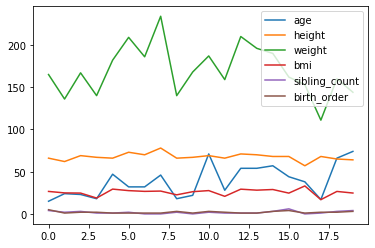

In [8]:
people_df.plot();

### A more useful way to plot all variables at the same time is a pairplot or correlation plot
- distribution of the variable is shown in histograms along the diagonal
- scatterplots plot two variables at a time and give an indication of which variables may be correlated

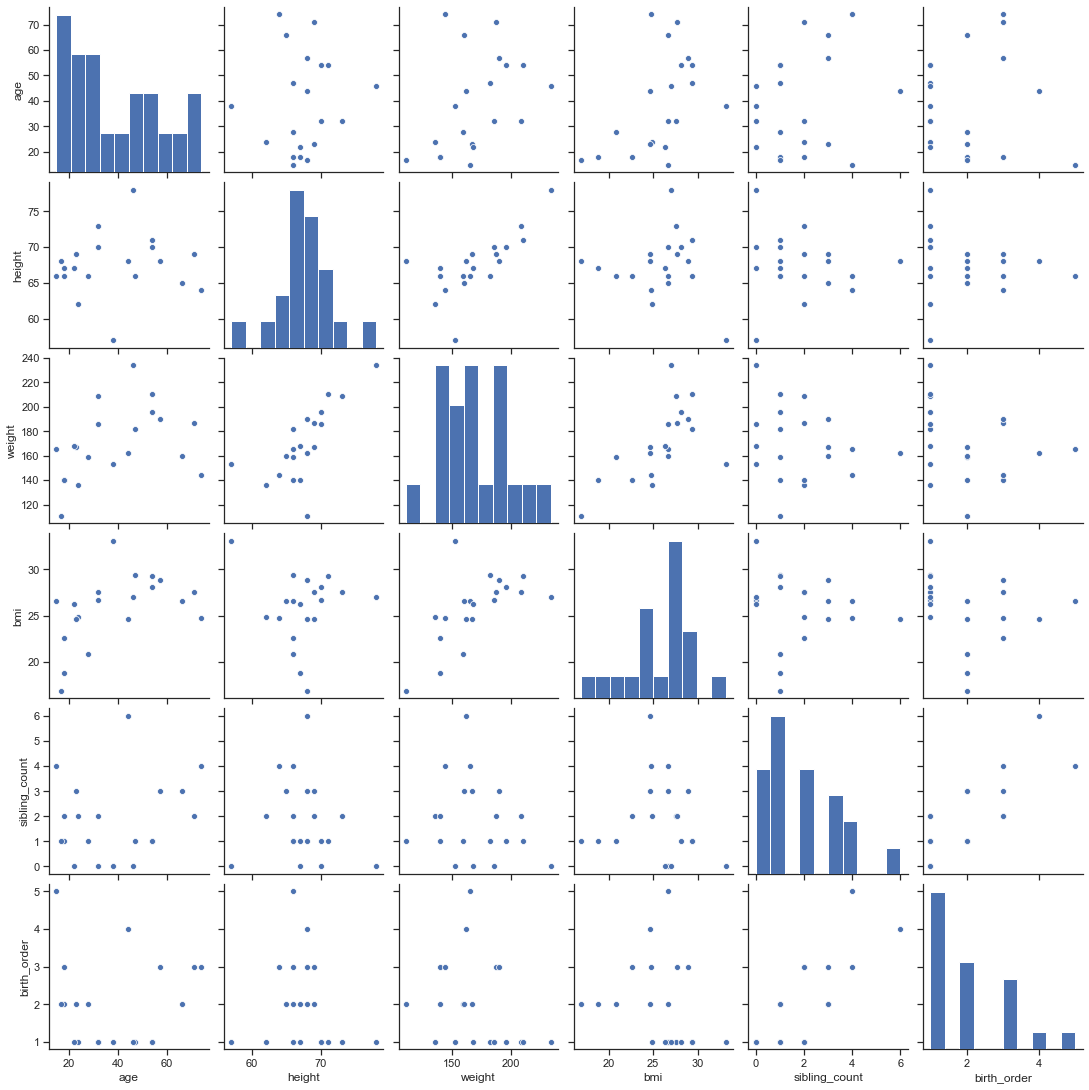

In [9]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(people_df);

### We'll use matplotlib and seaborn to examine additional plots and what they help communicate

- to look at the distribution of continuous data, a histogram is most frequently used

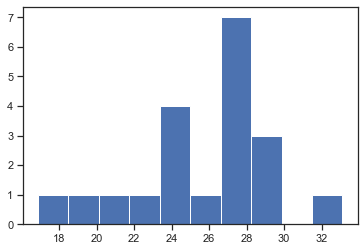

In [10]:
plt.hist('bmi', data = people_df);

- to look at counts of discrete data, a barplot is often used

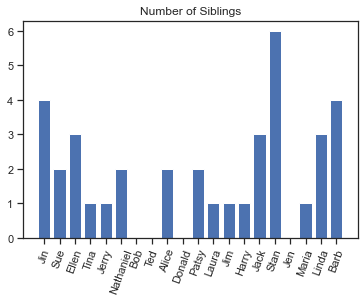

In [11]:
plt.bar('name', 'sibling_count', data = people_df)
plt.xticks(rotation = 70)
plt.title('Number of Siblings');

- sorting the data first on the variable you are counting helps the readibility of a barplot

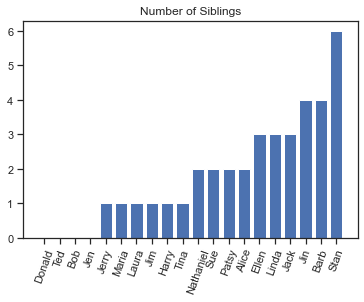

In [12]:
data = people_df.sort_values('sibling_count')
plt.bar('name', 'sibling_count', data = data)
plt.xticks(rotation = 70)
plt.title('Number of Siblings');

### The basic `plot( )` method in the `matpotlib pyplot` module is versatile. 
- It is generally used to create line plots, but can be used for scatterplots with the `linestyle =` argument set to `'none'` as below

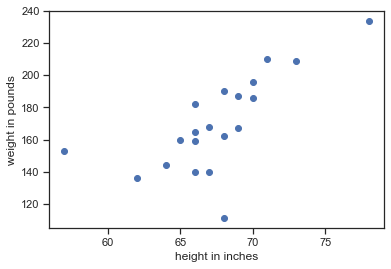

In [13]:
plt.plot('height', 'weight', marker = 'o', linestyle = 'none', data = people_df)
plt.xlabel('height in inches')
plt.ylabel('weight in pounds');

### The `scatter( )` method is a more direct way to create a scatterplot

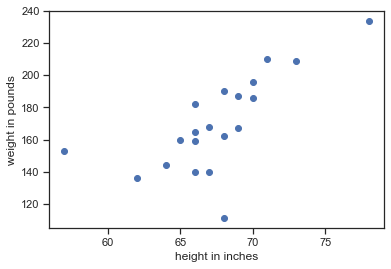

In [14]:
plt.scatter('height', 'weight', data = people_df)
plt.xlabel('height in inches')
plt.ylabel('weight in pounds');

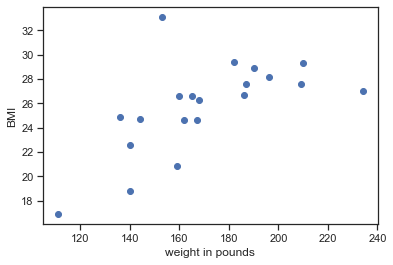

In [15]:
plt.scatter('weight', 'bmi', data = people_df)
plt.xlabel('weight in pounds')
plt.ylabel('BMI');

### Matplotlib can get pretty fancy as in the plot below
- horizontal lines to show boundaries for `overweight` and `obese`
- annotations to label those boundaries

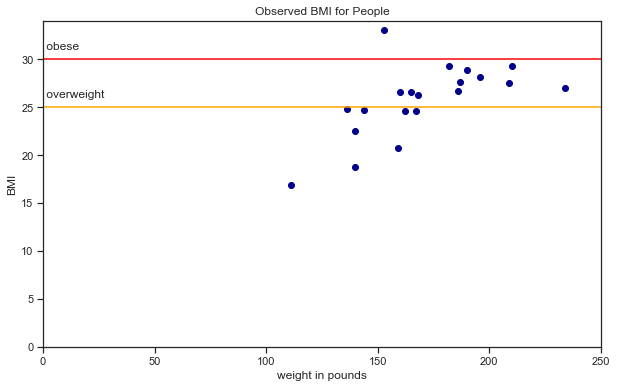

In [16]:
plt.figure(figsize=(10, 6))
plt.scatter('weight', 'bmi', data = people_df, color = 'darkblue')
plt.hlines(y=25, xmin = 0, xmax = 250, color = 'orange')
plt.hlines(y=30, xmin = 0, xmax = 250, color = 'red')
plt.xlim(0, 250)
plt.ylim(0, 34)
plt.annotate(s = ' overweight', xy = (0, 26))
plt.annotate(s = ' obese', xy = (0, 31))
plt.xlabel('weight in pounds')
plt.ylabel('BMI')
plt.title('Observed BMI for People');

### The `seaborn` package makes prettier plots
- boxplots are another way to look at the distribution of a variable. The top and bottom borders of the blue rectangle define the 3rd and 1st quartiles. The middle line is the 2nd quartile (median). The lines parallell to the rectangle (called whiskers) indicate the range of data in the distribution. Outliers will appear as dots beyond these lines.

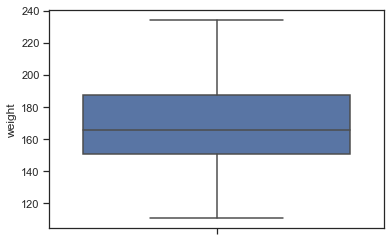

In [17]:
sns.boxplot(y=people_df.weight);

### adding a value for `x` tells seaborn to create multiple boxplots, one for each unique value in the specified `x` 

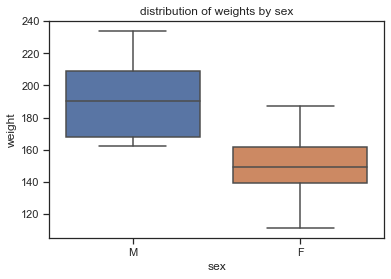

In [18]:
sns.boxplot(y=people_df.weight, x = people_df.sex, )
plt.title('distribution of weights by sex');
#plt.xlabel('')

### Two more plots that can be helpful in getting to know the data (particularly with large datasets) are strip plots and swarm plots.
- adding jitter to a strip plot randomly moves the dots a bit off their actual location (which is similar to what a swarm plot does)

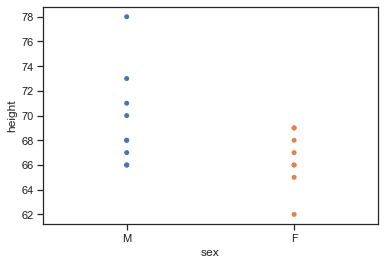

In [19]:
sns.stripplot(x=people_df.sex, y=people_df.height, jitter = False);

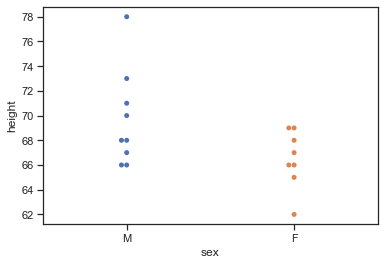

In [20]:
sns.swarmplot(x=people_df.sex, y=people_df.height);

### Calculate in dataframe

In [21]:
people_df['bmi_calculated'] = 703 * people_df['weight']/people_df['height']**2